### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
import seaborn as sns
import pandas_profiling
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

from sklearn import datasets
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif




In [2]:
train=pd.read_csv('C:/Users/Yash/Desktop/STATS/CASE STUDY FOR ML/3. Network Intrusion Detection System/NSL_Dataset/Train.txt',sep=',')
test=pd.read_csv('C:/Users/Yash/Desktop/STATS/CASE STUDY FOR ML/3. Network Intrusion Detection System/NSL_Dataset/Test.txt',sep=',')

In [3]:
train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
test.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [5]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [6]:
train.columns=columns
test.columns=columns

In [7]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [8]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

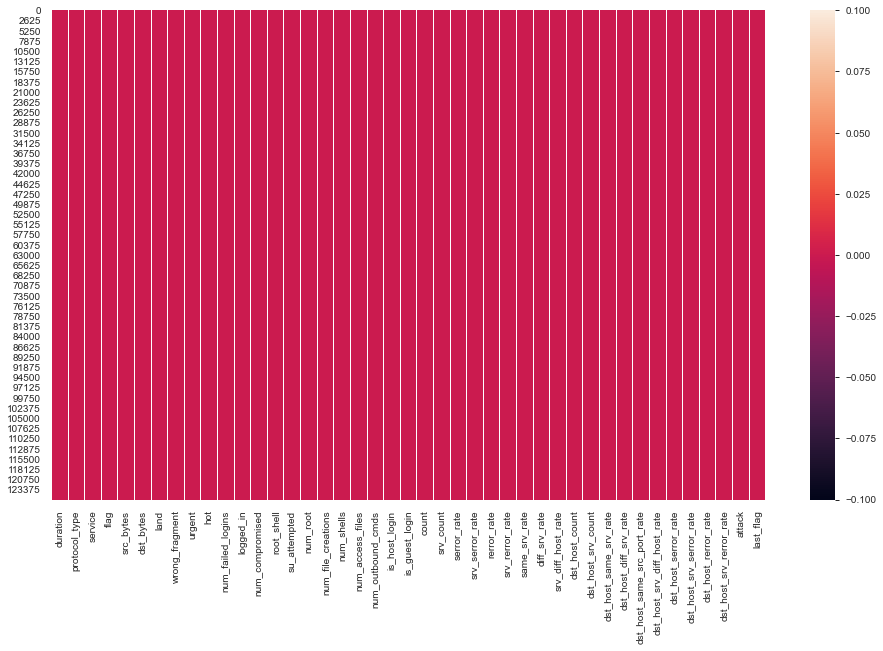

In [9]:
# Show the null values using heat
plt.figure(figsize=(16,9))
sns.heatmap(train.isnull())

In [10]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [11]:
test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

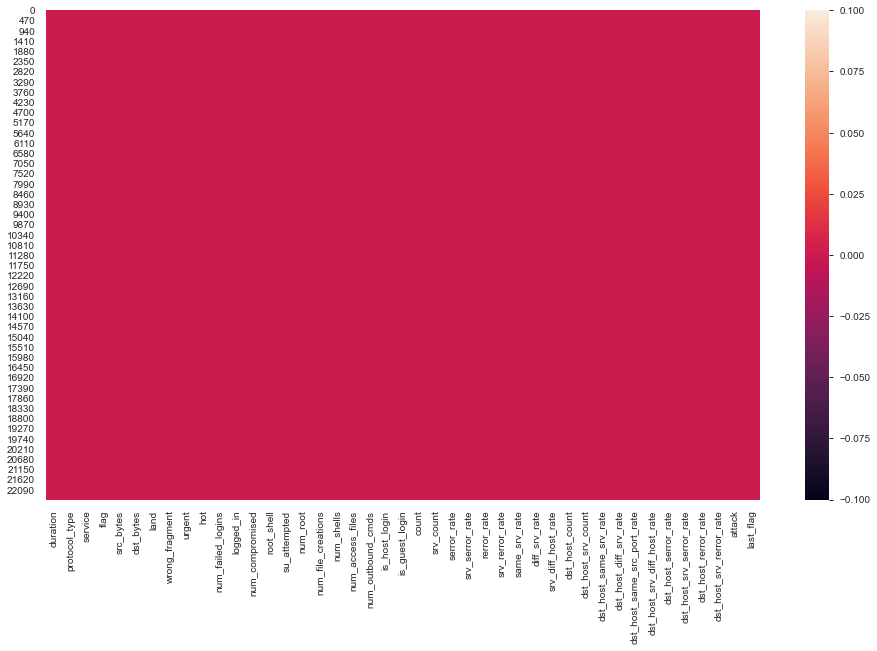

In [12]:
# Show the null values using heat
plt.figure(figsize=(16,9))
sns.heatmap(test.isnull())

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [15]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [16]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,22543.0,218.868784,1407.207069,0.0,0.00,0.00,0.00,57715.0
src_bytes,22543.0,10395.911369,472796.912692,0.0,0.00,54.00,287.00,62825648.0
dst_bytes,22543.0,2056.110012,21219.763847,0.0,0.00,46.00,601.00,1345927.0
land,22543.0,0.000311,0.017619,0.0,0.00,0.00,0.00,1.0
wrong_fragment,22543.0,0.008428,0.142602,0.0,0.00,0.00,0.00,3.0
urgent,22543.0,0.000710,0.036474,0.0,0.00,0.00,0.00,3.0
hot,22543.0,0.105399,0.928448,0.0,0.00,0.00,0.00,101.0
num_failed_logins,22543.0,0.021648,0.150331,0.0,0.00,0.00,0.00,4.0
logged_in,22543.0,0.442222,0.496661,0.0,0.00,0.00,1.00,1.0
num_compromised,22543.0,0.119904,7.269758,0.0,0.00,0.00,0.00,796.0


In [17]:
train['attack'].value_counts()

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [18]:
test['attack'].value_counts()

normal             9711
neptune            4656
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
sqlattack             2
phf                   2
loadmodule            2
perl                  2
udpstorm              2
imap                  1
Name: attack, dtype: int64

In [19]:
train['attack_class']=np.where(train.attack=='normal',0,np.where((train.attack=='back') |
        (train.attack=='land') | (train.attack=='pod') | (train.attack=='neptune') | 
         (train.attack=='smurf') | (train.attack=='teardrop') | (train.attack=='apache2') | (train.attack=='udpstorm') | 
         (train.attack=='processtable') | (train.attack=='worm') | (train.attack=='mailbomb'),1,np.where((train.attack=='satan') |
        (train.attack=='ipsweep') | (train.attack=='nmap') | (train.attack=='portsweep') | 
          (train.attack=='mscan') | (train.attack=='saint'),2,np.where((train.attack=='guess_passwd') | (train.attack=='ftp_write') |
        (train.attack=='imap') | (train.attack=='phf') | 
          (train.attack=='multihop') | (train.attack=='warezmaster') | (train.attack=='warezclient') | (train.attack=='spy') | 
          (train.attack=='xlock') | (train.attack=='xsnoop') | (train.attack=='snmpguess') | (train.attack=='snmpgetattack') | 
          (train.attack=='httptunnel') | (train.attack=='sendmail') | (train.attack=='named'),3,4))))

In [20]:
test['attack_class']=np.where(test.attack=='normal',0,np.where((test.attack=='back') | 
        (test.attack=='land') | (test.attack=='pod') | (test.attack=='neptune') | 
         (test.attack=='smurf') | (test.attack=='teardrop') | (test.attack=='apache2') | (test.attack=='udpstorm') | 
         (test.attack=='processtable') | (test.attack=='worm') | (test.attack=='mailbomb'),1,np.where((test.attack=='satan') | 
        (test.attack=='ipsweep') | (test.attack=='nmap') | (test.attack=='portsweep') | 
          (test.attack=='mscan') | (test.attack=='saint'),2,np.where((test.attack=='guess_passwd') | (test.attack=='ftp_write') |
        (test.attack=='imap') | (test.attack=='phf') | 
          (test.attack=='multihop') | (test.attack=='warezmaster') | (test.attack=='warezclient') | (test.attack=='spy') | 
          (test.attack=='xlock') | (test.attack=='xsnoop') | (test.attack=='snmpguess') | (test.attack=='snmpgetattack') | 
          (test.attack=='httptunnel') | (test.attack=='sendmail') | (test.attack=='named'),3,4))))

#### Binomial Classification

##### In attack_class normal means 0 and attack means 1.

In [21]:
train['attack_class']=np.where(train.attack=='normal',0,1)

In [22]:
train.attack_class.value_counts()

0    67342
1    58630
Name: attack_class, dtype: int64

In [23]:
test['attack_class']=np.where(test.attack=='normal',0,1)

In [24]:
test.attack_class.value_counts()

1    12832
0     9711
Name: attack_class, dtype: int64

In [25]:
train.shape

(125972, 44)

In [26]:
test.shape

(22543, 44)

# EDA

In [27]:
#!pip install pandas-profiling

In [28]:
##pandas_profiling.ProfileReport(train)

In [29]:
#import sweetviz

In [30]:
#my_report = sweetviz.analyze([train, "Train"],target_feat='attack_class')

In [31]:
#my_report.show_html('Report.html')

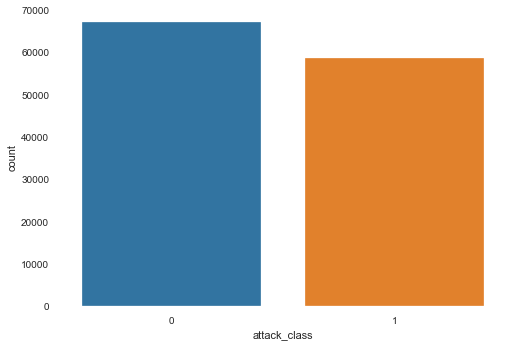

In [32]:
sns.countplot(train['attack_class'])

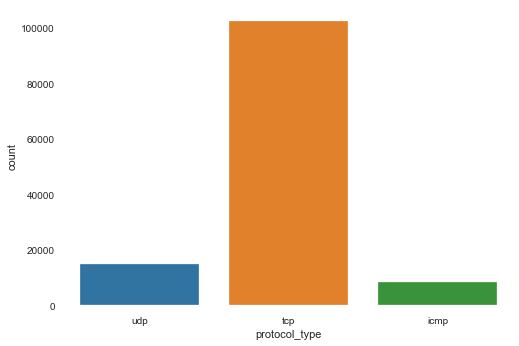

In [33]:
sns.countplot(train['protocol_type'])

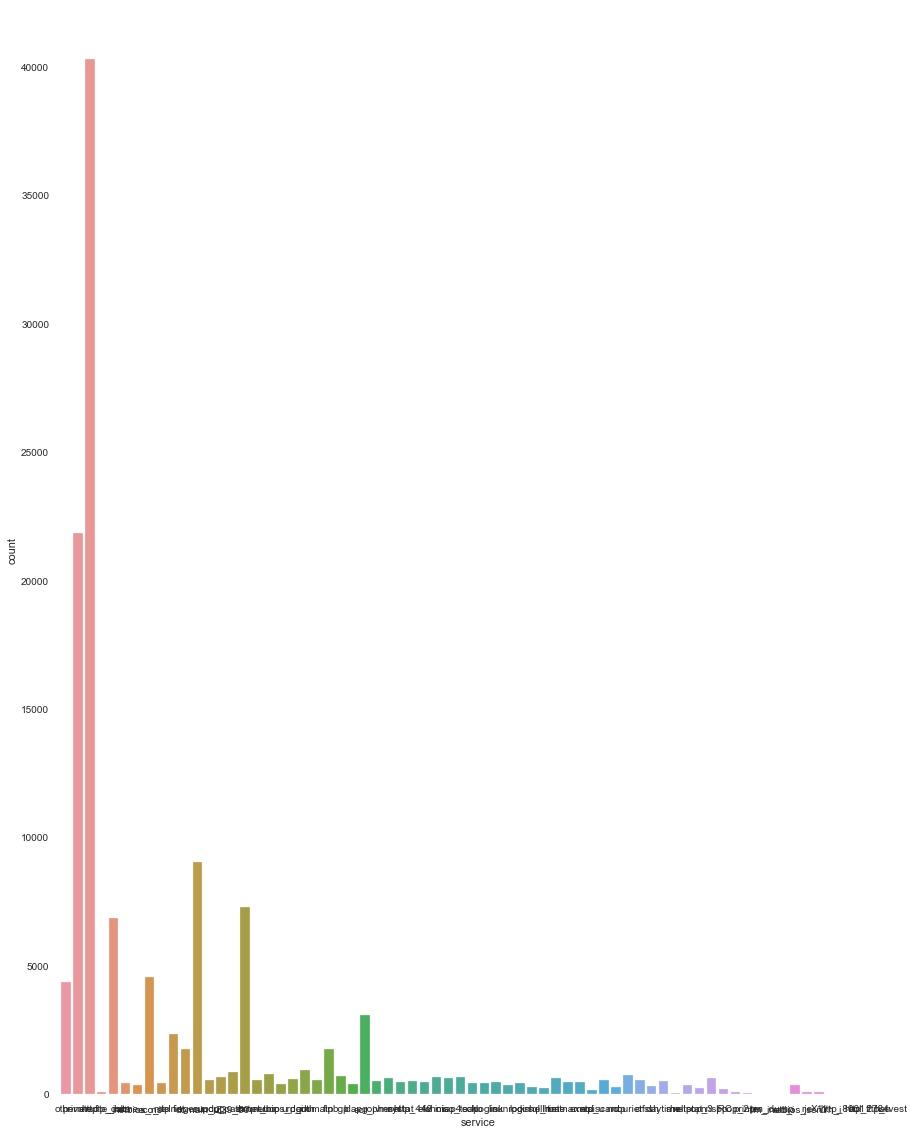

In [34]:
plt.figure(figsize=(15,20))
sns.countplot(train['service'])

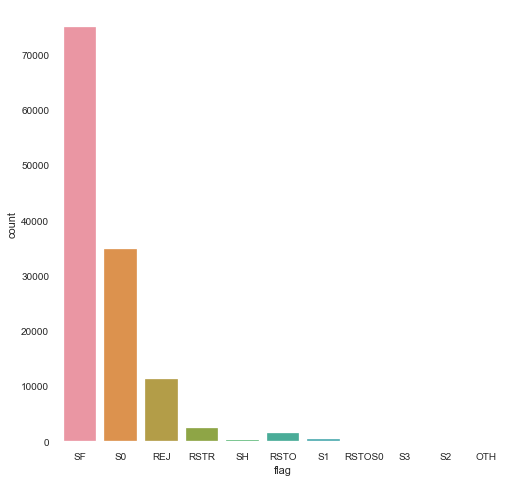

In [35]:
plt.figure(figsize=(8,8))
sns.countplot(train['flag'])
plt.show()

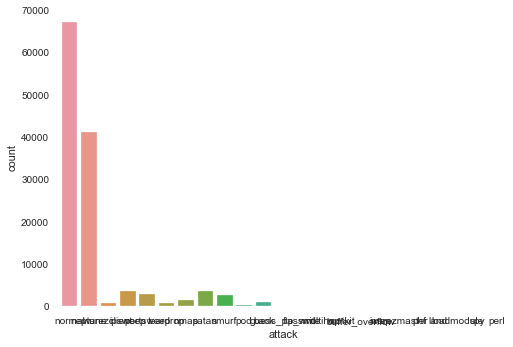

In [36]:
sns.countplot(train['attack'])
plt.show()

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Yash\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


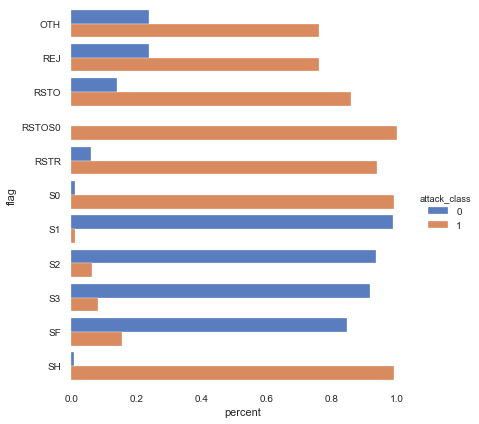

In [37]:
flag_count = train[['flag', 'attack_class']].groupby(['flag', 'attack_class']).size()
flag_count_percent = flag_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
flag_count_percent.columns = ['flag', 'attack_class', 'percent']
sns.factorplot(y="flag",
            x = 'percent',
            hue="attack_class",
            data = flag_count_percent,
            size=6,
            kind="bar",
            palette="muted")

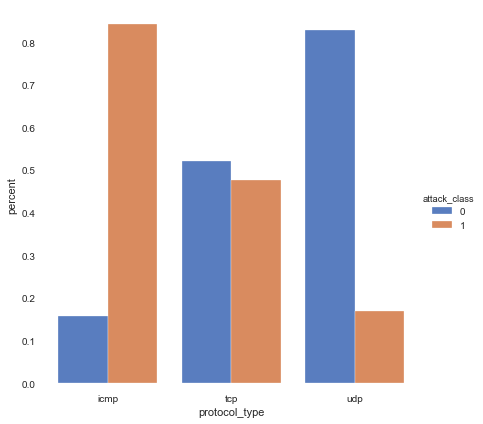

In [38]:
type_count = train[['protocol_type', 'attack_class']].groupby(['protocol_type', 'attack_class']).size()
type_count_percent = type_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
type_count_percent.columns = ['protocol_type', 'attack_class', 'percent']
sns.factorplot(x="protocol_type",
            y = 'percent',
            hue="attack_class",
            data = type_count_percent,
            size=6,
            kind="bar",
            palette="muted")

In [39]:
train.groupby('attack_class').mean()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
attack_class,,,,,,,,,,,,,,,,,,,,,
0,168.589899,13133.467064,4329.749517,0.000104,0.000000,0.000148,0.230658,0.001381,0.710656,0.507083,...,190.288215,0.811885,0.040134,0.121725,0.025996,0.013930,0.006117,0.046589,0.044699,20.315925
1,423.320689,82820.141327,37524.482159,0.000307,0.048746,0.000068,0.174262,0.001040,0.034027,0.017568,...,29.929081,0.187417,0.132131,0.178993,0.040062,0.595177,0.591329,0.201810,0.207008,18.571550


In [40]:
corrmatrix = train.corr()
corrmatrix

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064219,0.042679,...,-0.116006,0.254195,0.228737,-0.026670,-0.064949,-0.064361,0.173815,0.199023,-0.156310,0.048785
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,-0.022592,0.005921
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,-0.018076,0.004118
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,-0.037038,0.007191
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072419,-0.001044,...,-0.048734,0.059796,0.037177,-0.016252,-0.051917,-0.055918,0.028890,-0.033682,-0.157130,0.095905
urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,...,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,-0.016411,-0.002787
hot,0.000705,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,0.116435,0.002013,...,-0.036294,-0.012293,-0.034536,-0.024715,-0.058223,-0.058215,-0.030555,-0.031670,-0.160013,-0.013084
num_failed_logins,0.009528,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,-0.006439,0.019085,...,-0.001576,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359,-0.073178,-0.003755
logged_in,-0.064219,-0.003353,-0.002894,-0.011402,-0.072419,0.007299,0.116435,-0.006439,1.000000,0.014413,...,0.604056,-0.256067,-0.160994,-0.055955,-0.491484,-0.493270,-0.275974,-0.272809,0.269820,-0.690181
num_compromised,0.042679,-0.000086,0.001233,-0.000164,-0.001044,0.033329,0.002013,0.019085,0.014413,1.000000,...,-0.004995,0.002981,-0.002045,0.004252,-0.004377,-0.004898,-0.003647,-0.003219,-0.006101,-0.010198


### Data Audit

In [41]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [42]:
train_num_var=train.select_dtypes(['int64','float64','int32','float32'])
test_num_var=test.select_dtypes(['int64','float64','int32','float32'])

In [43]:
train_cat_var = train.select_dtypes('object')
test_cat_var=test.select_dtypes('object')

In [44]:
test_cat_var

,protocol_type,service,flag,attack
0,tcp,private,REJ,neptune
1,tcp,ftp_data,SF,normal
2,icmp,eco_i,SF,saint
3,tcp,telnet,RSTO,mscan
4,tcp,http,SF,normal
...,...,...,...,...
22538,tcp,smtp,SF,normal
22539,tcp,http,SF,normal
22540,tcp,http,SF,back
22541,udp,domain_u,SF,normal


In [45]:
train_num_var.apply(continuous_var_summary).T
test_num_var.apply(continuous_var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,22543.0,0.0,4.933959e+06,218.868784,0.00,1407.207069,1.980232e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,4.00,283.00,7589.5800,57715.0
src_bytes,22543.0,0.0,2.343550e+08,10395.911369,54.00,472796.912692,2.235369e+11,0.0,0.0,0.00,0.00,0.00,54.00,287.00,1032.00,15876.00,283618.0000,62825648.0
dst_bytes,22543.0,0.0,4.635089e+07,2056.110012,46.00,21219.763847,4.502784e+08,0.0,0.0,0.00,0.00,0.00,46.00,601.00,4099.40,8314.00,26032.7600,1345927.0
land,22543.0,0.0,7.000000e+00,0.000311,0.00,0.017619,3.104350e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,1.0
wrong_fragment,22543.0,0.0,1.900000e+02,0.008428,0.00,0.142602,2.033531e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,3.0
urgent,22543.0,0.0,1.600000e+01,0.000710,0.00,0.036474,1.330345e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,3.0
hot,22543.0,0.0,2.376000e+03,0.105399,0.00,0.928448,8.620164e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.0000,101.0
num_failed_logins,22543.0,0.0,4.880000e+02,0.021648,0.00,0.150331,2.259941e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0000,4.0
logged_in,22543.0,0.0,9.969000e+03,0.442222,0.00,0.496661,2.466726e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.0000,1.0
num_compromised,22543.0,0.0,2.703000e+03,0.119904,0.00,7.269758,5.284939e+01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0000,796.0


In [46]:
train_cat_var.apply(categorical_var_summary).T
test_cat_var.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
protocol_type,22543,0,tcp,18879,83.75
service,22543,0,http,7853,34.84
flag,22543,0,SF,14875,65.99
attack,22543,0,normal,9711,43.08


#### Outlier Treatment

In [47]:
train_num_var.apply(continuous_var_summary).T
test_num_var.apply(continuous_var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,22543.0,0.0,4.933959e+06,218.868784,0.00,1407.207069,1.980232e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,4.00,283.00,7589.5800,57715.0
src_bytes,22543.0,0.0,2.343550e+08,10395.911369,54.00,472796.912692,2.235369e+11,0.0,0.0,0.00,0.00,0.00,54.00,287.00,1032.00,15876.00,283618.0000,62825648.0
dst_bytes,22543.0,0.0,4.635089e+07,2056.110012,46.00,21219.763847,4.502784e+08,0.0,0.0,0.00,0.00,0.00,46.00,601.00,4099.40,8314.00,26032.7600,1345927.0
land,22543.0,0.0,7.000000e+00,0.000311,0.00,0.017619,3.104350e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,1.0
wrong_fragment,22543.0,0.0,1.900000e+02,0.008428,0.00,0.142602,2.033531e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,3.0
urgent,22543.0,0.0,1.600000e+01,0.000710,0.00,0.036474,1.330345e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,3.0
hot,22543.0,0.0,2.376000e+03,0.105399,0.00,0.928448,8.620164e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.0000,101.0
num_failed_logins,22543.0,0.0,4.880000e+02,0.021648,0.00,0.150331,2.259941e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0000,4.0
logged_in,22543.0,0.0,9.969000e+03,0.442222,0.00,0.496661,2.466726e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.0000,1.0
num_compromised,22543.0,0.0,2.703000e+03,0.119904,0.00,7.269758,5.284939e+01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0000,796.0


#### Dummy Variables

In [48]:
train_cat_var = train[['protocol_type', 'service','flag','attack']]

for c_feature in ['protocol_type', 'service','flag','attack']:
    train_cat_var[c_feature] = train_cat_var[c_feature].astype('category')
    train_cat_var = create_dummies(train_cat_var, c_feature)

C:\Users\Yash\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [49]:
test_cat_var = test[['protocol_type', 'service','flag','attack']]

for c_feature in ['protocol_type', 'service','flag','attack']:
    test_cat_var[c_feature] = test_cat_var[c_feature].astype('category')
    test_cat_var = create_dummies(test_cat_var, c_feature)

C:\Users\Yash\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [50]:
train_new= pd.concat([train_num_var, train_cat_var], axis = 1)
test_new = pd.concat([test_num_var, test_cat_var], axis = 1)

In [51]:
train_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
test_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_snmpgetattack,attack_snmpguess,attack_sqlattack,attack_teardrop,attack_udpstorm,attack_warezmaster,attack_worm,attack_xlock,attack_xsnoop,attack_xterm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,267,14515,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
corrm=train_new.corr()
corrm

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064219,0.042679,...,-0.000612,-0.004407,0.471677,-0.000637,-0.018990,-0.016149,0.000047,-0.009310,0.013536,-0.001316
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,-0.000044,-0.000300,0.039127,-0.000069,-0.001338,-0.001114,-0.000031,-0.000655,0.004288,-0.000098
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,-0.000016,-0.000197,0.026878,-0.000034,-0.000847,-0.000720,-0.000018,-0.000415,-0.000398,0.012228
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,-0.000079,-0.000563,-0.002174,-0.000126,-0.002428,-0.002064,-0.000056,-0.001190,-0.001188,-0.000178
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072419,-0.001044,...,-0.000504,0.151750,-0.013812,-0.000797,-0.015421,-0.013108,-0.000357,0.985733,-0.007548,-0.001128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
attack_smurf,-0.016149,-0.001114,-0.000720,-0.002064,-0.013108,-0.001133,-0.013926,-0.003958,-0.118539,-0.001708,...,-0.000825,-0.005856,-0.022607,-0.001305,-0.025242,1.000000,-0.000584,-0.012370,-0.012356,-0.001846
attack_spy,0.000047,-0.000031,-0.000018,-0.000056,-0.000357,-0.000031,-0.000379,-0.000108,0.000850,-0.000046,...,-0.000022,-0.000159,-0.000615,-0.000036,-0.000687,-0.000584,1.000000,-0.000336,-0.000336,-0.000050
attack_teardrop,-0.009310,-0.000655,-0.000415,-0.001190,0.985733,-0.000653,-0.008029,-0.002282,-0.068341,-0.000985,...,-0.000476,-0.003376,-0.013034,-0.000752,-0.014553,-0.012370,-0.000336,1.000000,-0.007123,-0.001064
attack_warezclient,0.013536,0.004288,-0.000398,-0.001188,-0.007548,-0.000653,0.352671,-0.002279,0.104233,-0.000984,...,-0.000475,-0.003372,-0.013019,-0.000752,-0.014536,-0.012356,-0.000336,-0.007123,1.000000,-0.001063


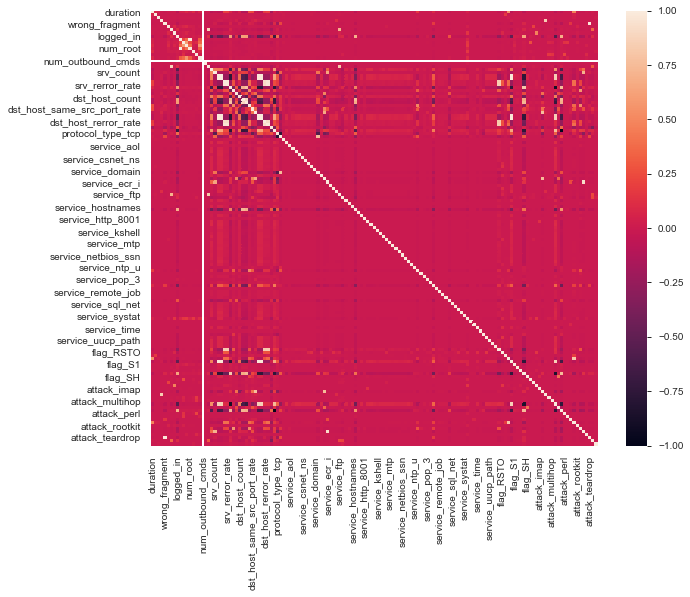

In [54]:
plt.figure(figsize = (10, 8))
sns.heatmap(corrm)

### Dropping columns 
   #### - High missings (>25% missings)
   #### - High correlations between two numerical variables
   #### - low variance 

In [55]:
train_new.drop(columns=['land','wrong_fragment','urgent','num_failed_logins',"root_shell","su_attempted","num_root",
                        "num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
                        'dst_host_rerror_rate','dst_host_serror_rate','dst_host_srv_rerror_rate','dst_host_srv_serror_rate',
                        'num_root','num_outbound_cmds','srv_rerror_rate','srv_serror_rate'],inplace=True)

In [56]:
test_new.drop(columns=['land','wrong_fragment','urgent','num_failed_logins',"root_shell","su_attempted","num_root",
                        "num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
                        'dst_host_rerror_rate','dst_host_serror_rate','dst_host_srv_rerror_rate','dst_host_srv_serror_rate',
                        'num_root','num_outbound_cmds','srv_rerror_rate','srv_serror_rate'],inplace=True)

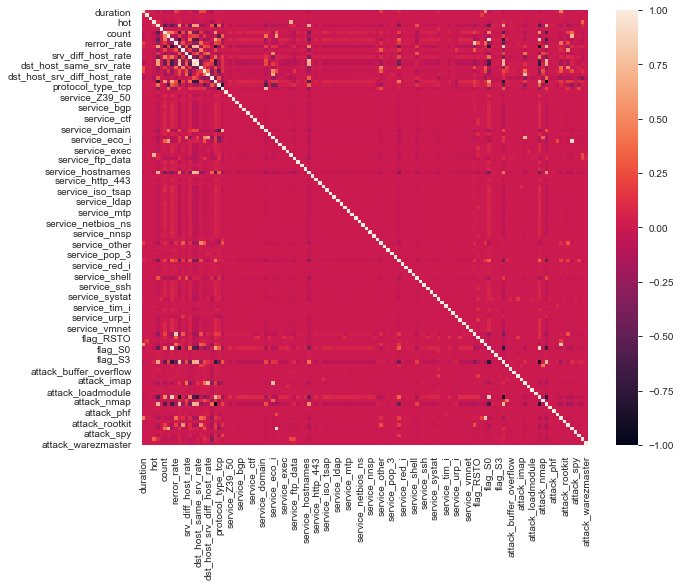

In [57]:
plt.figure(figsize = (10, 8))
sns.heatmap(train_new.corr())

#### Final Variables

In [58]:
columns=['count','diff_srv_rate','dst_bytes','dst_host_count',
                 'dst_host_diff_srv_rate','dst_host_same_src_port_rate',
                 'dst_host_srv_diff_host_rate','duration',
                 'hot','last_flag','logged_in','num_compromised',
                 'srv_count','srv_diff_host_rate']

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
train_X=train_new[columns]
train_y=train_new['attack_class']
test_X=test_new[columns]
test_y=test_new['attack_class']

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(test_X)

### Model Building

## Random Forest Classifier

In [62]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [63]:
model_1=RandomForestClassifier(n_estimators=100, max_depth=2,random_state=1355,n_jobs=-1 )

In [64]:
model_1.fit(train_X,train_y)

RandomForestClassifier(max_depth=2, n_jobs=-1, random_state=1355)

In [65]:
y_pred=model_1.predict(X_test_scaled)

In [66]:
model_1.score(X_test_scaled,test_y)

0.7817060728385752

In [67]:
train_score_1=model_1.score(train_X,train_y)
train_score_1

0.955950528688915

In [68]:
radm_test_pred_df = pd.DataFrame( { 'actual':  test_y,
                                   'predicted': y_pred } )

In [69]:
radm_test_pred_df.head()

,actual,predicted
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0


In [70]:
test_score_1=metrics.accuracy_score(radm_test_pred_df.actual, radm_test_pred_df.predicted)
test_score_1

0.7817060728385752

In [71]:
report_1=pd.DataFrame({'Model':['Random Forrest Pre'],
                       'Train Score':train_score_1,
                       'Test Score':test_score_1})

In [72]:
report_1

,Model,Train Score,Test Score
0,Random Forrest Pre,0.955951,0.781706


In [73]:
tree_cm = metrics.confusion_matrix(radm_test_pred_df.actual, radm_test_pred_df.predicted,[1,0] )

C:\Users\Yash\anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [74]:
tree_cm

array([[10254,  2578],
       [ 2343,  7368]], dtype=int64)

Text(0.5, 26.0, 'True label')

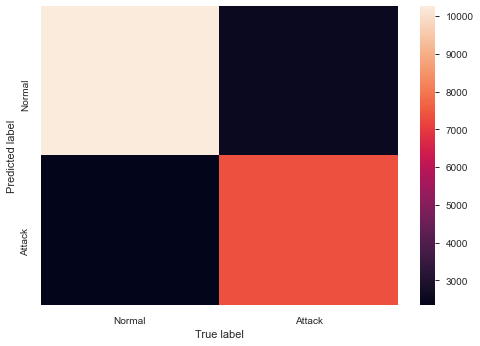

In [75]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

### Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0,solver='lbfgs',multi_class='multinomial')
logreg.fit( X_train_scaled, train_y)

LogisticRegression(multi_class='multinomial', random_state=0)

In [77]:
y_pred_1=logreg.predict(X_test_scaled)

In [78]:
logreg.score(X_test_scaled,test_y)

0.8391962028124029

In [79]:
train_score_2=logreg.score(X_train_scaled,train_y)
train_score_2

0.957419109008351

In [80]:
log_test_pred_df_1 = pd.DataFrame( { 'actual':  test_y,
                            'predicted': y_pred } )

In [81]:
log_test_pred_df_1.head()

,actual,predicted
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0


In [82]:
test_score_2=metrics.accuracy_score(log_test_pred_df_1.actual, log_test_pred_df_1.predicted)
test_score_2

0.7817060728385752

In [83]:
report_2=pd.DataFrame({'Model':['Lgistic'],'Train Score':train_score_2,'Test Score':test_score_2})

In [84]:
report_2

,Model,Train Score,Test Score
0,Lgistic,0.957419,0.781706


In [85]:
tree_cm_1 = metrics.confusion_matrix(log_test_pred_df_1.actual, log_test_pred_df_1.predicted,[1,0] )

C:\Users\Yash\anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [86]:
tree_cm_1

array([[10254,  2578],
       [ 2343,  7368]], dtype=int64)

Text(0.5, 26.0, 'True label')

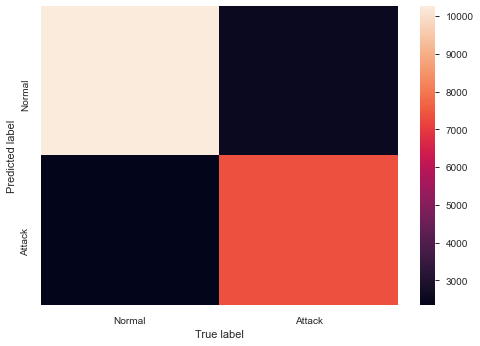

In [87]:
sns.heatmap(tree_cm_1,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

## SVM Model

In [88]:

from sklearn.svm import SVC

In [89]:
svc=SVC()

In [90]:
svc.fit(X_train_scaled,train_y)

SVC()

In [91]:
y_pred=svc.predict(X_test_scaled)

In [92]:
#test accuracy

svc.score(X_test_scaled,test_y)

0.8283280841059308

In [93]:

#Train accuracy

svc.score(X_train_scaled,train_y)

0.9899342711078652

In [94]:
#Confusion matrix

tree_cm_svm=metrics.confusion_matrix(test_y,y_pred)

In [95]:
tree_cm_svm

array([[9030,  681],
       [3189, 9643]], dtype=int64)

Text(0.5, 26.0, 'True label')

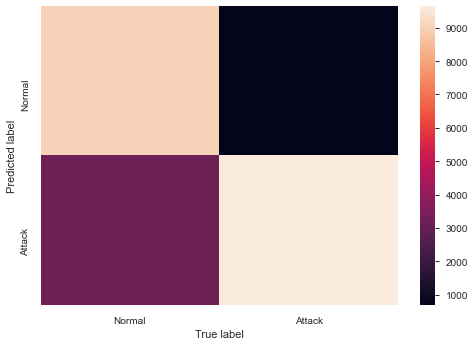

In [96]:
sns.heatmap(tree_cm_svm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')


# 2. Multinomial classification: Activity is normal or DOS or PROBE or R2L or U2R

In [97]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [98]:
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [99]:
DoS_attack_1=['neptune','smurf','back','teardrop','pod','land','apache2','processtable','worm','udpstorm '] 


Probe_attack_2=['satan','ipsweep','portsweep','nmap','mscan','saint'] 


R2L_attack_3=['warezclient','guess_passwd','warezmaster','imap','ftp_write','multihop','phf','spy','snmpguess','mailbomb',
          'snmpgetattack ','httptunnel','named','sendmail','xsnoop','Xlock'] 


U2R_attack_4=['buffer_overflow','rootkit','loadmodule','perl','ps','xterm','sqlattack']

In [100]:
train['attack']=train['attack'].apply(lambda x: 1 if x in DoS_attack_1 else 2 if x in Probe_attack_2 else 3 if x in R2L_attack_3 else 4 if x in U2R_attack_4 else 0)

In [101]:
test['attack']=test['attack'].apply(lambda x: 1 if x in DoS_attack_1 else 2 if x in Probe_attack_2 else 3 if x in R2L_attack_3 else 4 if x in U2R_attack_4 else 0)

In [102]:
train['attack'].value_counts()

0    67342
1    45927
2    11656
3      995
4       52
Name: attack, dtype: int64

In [103]:
test['attack'].value_counts()

0    9900
1    7164
3    2991
2    2421
4      67
Name: attack, dtype: int64

In [104]:
#for tain data

In [105]:
dummy_protocol_type=pd.get_dummies(train['protocol_type'],prefix='protocol',drop_first=True)
dummy_service=pd.get_dummies(train['service'],prefix='service',drop_first=True)
dummy_flag=pd.get_dummies(train['flag'],prefix='flag',drop_first=True)

In [106]:
train=pd.concat([train,dummy_protocol_type,dummy_service,dummy_flag],axis=1)

In [107]:
train=train.drop(['protocol_type','service','flag'],axis=1)

In [108]:
#for test data

In [109]:
dummy_protocol_type=pd.get_dummies(test['protocol_type'],prefix='protocol',drop_first=True)
dummy_service=pd.get_dummies(test['service'],prefix='service',drop_first=True)
dummy_flag=pd.get_dummies(test['flag'],prefix='flag',drop_first=True)

In [110]:
test=pd.concat([test,dummy_protocol_type,dummy_service,dummy_flag],axis=1)


In [111]:

test=test.drop(['protocol_type','service','flag'],axis=1)

In [112]:
train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [113]:
test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,267,14515,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [114]:
unique_columns=set(train.columns.tolist())-set(test.columns.tolist())
unique_columns

{'service_aol',
 'service_harvest',
 'service_http_2784',
 'service_http_8001',
 'service_red_i',
 'service_urh_i'}

In [115]:
train=train.drop(['service_aol','service_harvest','service_http_2784','service_http_8001','service_red_i',
                        'service_urh_i'],axis=1)

In [116]:
X_train=train[train.columns.difference(['attack'])]
y_train=train['attack']

In [117]:
X_train.head()

,attack_class,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,...,service_vmnet,service_whois,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment
0,0,13,0.15,0,255,0.60,0.0,0.88,0.00,0.00,...,0,0,146,1,0.00,0.0,0.0,0,0,0
1,1,123,0.07,0,255,0.05,0.0,0.00,0.10,1.00,...,0,0,0,6,0.00,0.0,1.0,0,0,0
2,0,5,0.00,8153,30,0.00,0.0,0.03,1.00,0.03,...,0,0,232,5,0.00,0.0,0.2,0,0,0
3,0,30,0.00,420,255,0.00,0.0,0.00,1.00,0.00,...,0,0,199,32,0.09,0.0,0.0,0,0,0
4,1,121,0.06,0,255,0.07,1.0,0.00,0.07,0.00,...,0,0,0,19,0.00,1.0,0.0,0,0,0


In [118]:
y_train.head()

0    0
1    1
2    0
3    0
4    1
Name: attack, dtype: int64

In [119]:
X_test=test[test.columns.difference(['attack'])]
y_test=test['attack']

In [120]:
X_test.head()

,attack_class,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,...,service_vmnet,service_whois,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment
0,1,136,0.06,0,255,0.06,1.00,0.00,0.00,0.00,...,0,0,0,1,0.00,1.0,0.00,0,0,0
1,0,1,0.00,0,134,0.04,0.00,0.61,0.61,0.00,...,0,0,12983,1,0.00,0.0,0.00,0,0,0
2,1,1,0.00,0,3,0.00,0.00,1.00,1.00,0.00,...,0,0,20,65,1.00,0.0,0.00,0,0,0
3,1,1,0.00,15,29,0.17,0.83,0.03,0.31,0.00,...,0,0,0,8,0.75,0.5,0.12,0,0,0
4,0,4,0.00,14515,155,0.00,0.00,0.01,1.00,0.01,...,0,0,267,4,0.00,0.0,0.00,0,0,0


In [121]:
y_test.head()

0    1
1    0
2    2
3    2
4    0
Name: attack, dtype: int64

In [122]:
scaler = StandardScaler()
X_train_scaled_1 = scaler.fit_transform(train_X)
X_test_scaled_1 = scaler.transform(test_X)

In [123]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [124]:
model_2=RandomForestClassifier(n_estimators=1000, max_depth=3,random_state=135,n_jobs=-1,class_weight='balanced')

In [125]:
model_2.fit(X_train_scaled_1,y_train)


RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=1000,
                       n_jobs=-1, random_state=135)

In [126]:
y_pred=model_2.predict(X_train_scaled_1)

In [127]:
model_2.score(X_test_scaled_1,y_test)

0.7923523932040988

In [128]:
model_2.score(X_train_scaled,y_train)

0.913044168545391

In [129]:
X_train_new=X_train[['count','dst_host_serror_rate','dst_host_srv_count','dst_host_srv_serror_rate','flag_S0','logged_in',
 'root_shell','serror_rate','service_http','service_telnet','srv_serror_rate','dst_host_diff_srv_rate','same_srv_rate',
                   'flag_SF','srv_count','root_shell','diff_srv_rate','duration','dst_host_same_src_port_rate'
,'num_compromised','num_file_creations','service_eco_i','service_ftp_data','dst_host_same_srv_rate','hot','dst_host_count',
'dst_host_rerror_rate','dst_host_srv_rerror_rate','service_private','is_guest_login','protocol_tcp','rerror_rate',
'dst_host_srv_diff_host_rate','srv_diff_host_rate','srv_rerror_rate','service_ftp','service_domain_u'
,'dst_bytes','num_root','flag_RSTR','flag_REJ','flag_RSTO','service_ecr_i','src_bytes','num_failed_logins','service_other'
,'flag_SH','protocol_udp','num_shells','service_pop_3','service_pop_2' ,'service_pm_dump','service_remote_job','service_rje'
,'service_shell','service_ntp_u','service_nntp','service_smtp','service_sql_net','service_printer','urgent']]

In [130]:
X_test_new=X_test[['count','dst_host_serror_rate','dst_host_srv_count','dst_host_srv_serror_rate','flag_S0','logged_in',
 'root_shell','serror_rate','service_http','service_telnet','srv_serror_rate','dst_host_diff_srv_rate','same_srv_rate',
                   'flag_SF','srv_count','root_shell','diff_srv_rate','duration','dst_host_same_src_port_rate'
,'num_compromised','num_file_creations','service_eco_i','service_ftp_data','dst_host_same_srv_rate','hot','dst_host_count',
'dst_host_rerror_rate','dst_host_srv_rerror_rate','service_private','is_guest_login','protocol_tcp','rerror_rate',
'dst_host_srv_diff_host_rate','srv_diff_host_rate','srv_rerror_rate','service_ftp','service_domain_u'
,'dst_bytes','num_root','flag_RSTR','flag_REJ','flag_RSTO','service_ecr_i','src_bytes','num_failed_logins','service_other'
,'flag_SH','protocol_udp','num_shells','service_pop_3','service_pop_2' ,'service_pm_dump','service_remote_job','service_rje'
,'service_shell','service_ntp_u','service_nntp','service_smtp','service_sql_net','service_printer','urgent']]

In [131]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
scale=MinMaxScaler(feature_range=(0,1))
X_train_new_scaled=scale.fit_transform(X_train_new)
X_test_new_scaled=scale.transform(X_test_new)

# RandomForestClassifier

In [133]:
model_2=RandomForestClassifier(n_estimators=1000, max_depth=3,random_state=145,n_jobs=-1,class_weight='balanced')

model_2.fit(X_train_new_scaled,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=1000,
                       n_jobs=-1, random_state=145)

In [134]:
y_pred=model_2.predict(X_test_new_scaled)

In [135]:
model_2.score(X_test_new_scaled,y_test)

0.6979550192964556

In [136]:
model_2.score(X_train_new_scaled,y_train)

0.8092988918172292

In [137]:
metrics.confusion_matrix(y_test,y_pred)

array([[8594,    0,  725,  534,   47],
       [1827, 3607, 1614,    0,  116],
       [  48,  166, 2176,   31,    0],
       [1236,    0,  273, 1318,  164],
       [   0,    0,    5,   23,   39]], dtype=int64)

# xgboost

In [138]:
from xgboost.sklearn  import XGBClassifier
xgb=XGBClassifier(n_estimators=1000,objective='multi:softmax',num_class=5)

In [139]:
xgb.fit(X_train_new_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_class=5, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [140]:
y_pred=xgb.predict(X_test_new_scaled)

In [141]:
xgb.score(X_test_new_scaled,y_test)

0.7793106507563323

In [142]:
xgb.score(X_train_new_scaled,y_train)

0.9999444320960214

In [143]:
metrics.confusion_matrix(y_test,y_pred)

array([[9623,   68,  205,    2,    2],
       [ 863, 6218,   83,    0,    0],
       [ 694,  164, 1563,    0,    0],
       [2826,    0,    6,  156,    3],
       [  57,    0,    0,    2,    8]], dtype=int64)

# SVM

In [144]:
svc=SVC()

In [145]:
svc.fit(X_train_new_scaled,y_train)

SVC()

In [146]:
y_pred=svc.predict(X_test_new_scaled)

In [147]:
svc.score(X_test_new_scaled,y_test)

0.7538925608836445

In [148]:
svc.score(X_train_new_scaled,y_train)

0.9869097894770267

In [149]:
metrics.confusion_matrix(y_test,y_pred)

array([[9209,  459,  231,    0,    1],
       [1197, 5932,   35,    0,    0],
       [ 573,  168, 1680,    0,    0],
       [2816,    0,    4,  171,    0],
       [  61,    0,    0,    3,    3]], dtype=int64)